In [2]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import autosklearn.regression as autoreg
from autosklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit
from pandas import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from functions import *
#from tsfresh import *

In [3]:
train = pd.read_csv("../data/train_elia.csv", index_col='time')
test = pd.read_csv("../data/test_elia.csv", index_col='time')

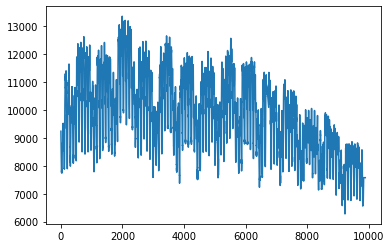

In [6]:
plt.plot(test.TotalLoad.to_numpy())

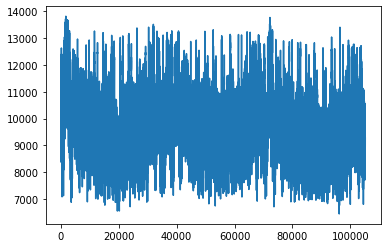

In [5]:
plt.plot(train.TotalLoad.to_numpy())

In [3]:
train = extract_dmhq(train)
test = extract_dmhq(test)

In [4]:
cols = train.columns[-5:]

In [6]:
cols = []

In [7]:
ftrain, ttrain = feature_target_construct(train, 'TotalLoad', 200, 192,
                                          0, 1, cols, 4)
ftest, ttest = feature_target_construct(test, 'TotalLoad', 200, 192,
                                          0, 1, cols, 4)

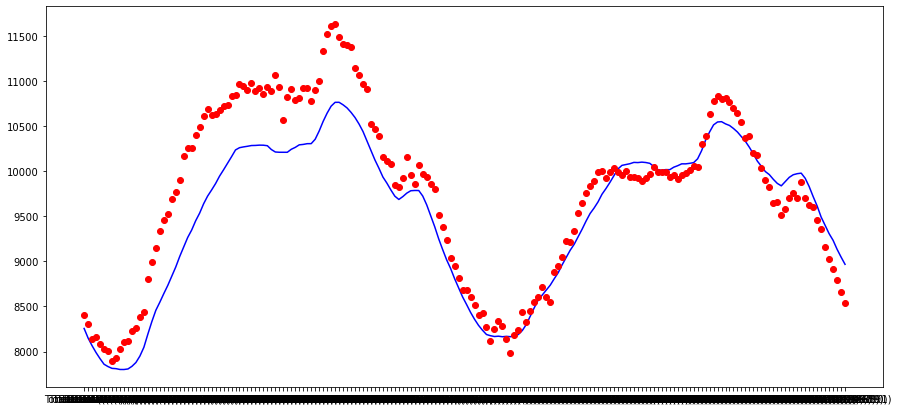

In [24]:
plt.figure(figsize = (15,7))
plt.plot(ypred[0,:], 'b-')
plt.plot(ttest.iloc[0,:], 'ro')

In [30]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 10000)
rr.fit(ftrain, ttrain)
ypred = rr.predict(ftest)
yhat = rr.predict(ftrain)

In [31]:
get_eval(ttrain, yhat)
get_eval(ttest.iloc[0,:], ypred[0,:])

MSE: 838252.4024802478
MAE: 691.0545257327943
r2_score: 0.5534629420274708
MSE: 185103.77918439588
MAE: 333.8103773663834
r2_score: 0.800716748323874


In [6]:
ftrain.drop('yd1(t+0)', axis = 1, inplace = True)
ftest.drop('yd1(t+0)', axis = 1, inplace = True)

In [7]:
ftrain.shape, ftest.shape

((7609, 204), (1497, 204))

### Creat lag ahead scenarios

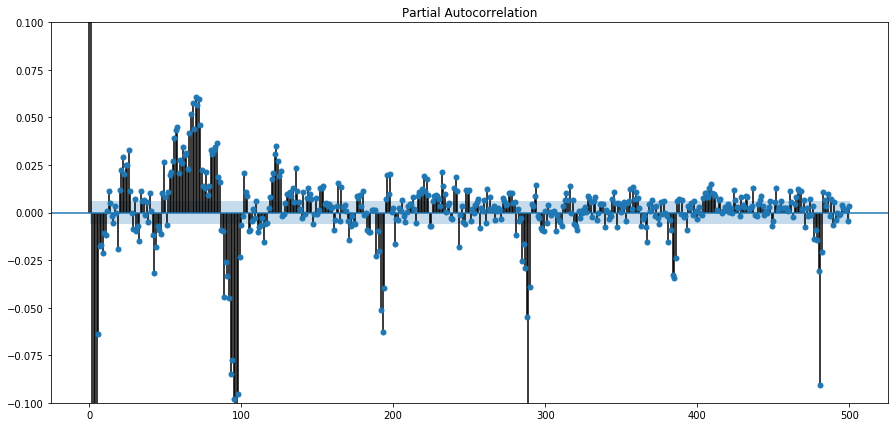

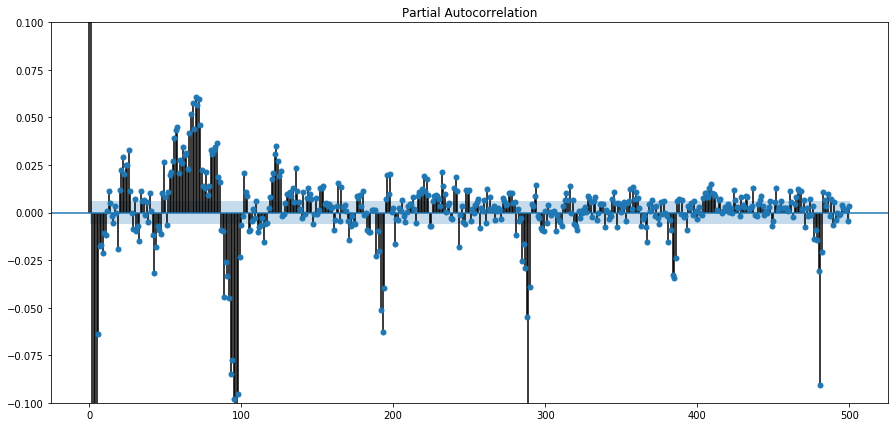

In [6]:
fig, ax = plt.subplots(figsize = (15,7))
plt.ylim(-0.1,0.1)
#plot_acf(train.TotalLoad.iloc[:1000], lags = 700, ax = ax)
plot_pacf(train.TotalLoad, lags = 500, ax = ax)


In [ ]:
pacf_val, conf = pacf(train.energy[-5000:], nlags = 700, alpha = 0.05)
indices = np.argwhere((np.abs(pacf_val) > 0.025))

In [2]:
train = pd.read_csv("../data/train_elia.csv", )
test = pd.read_csv("../data/test_elia.csv", )
ftrain, ttrain = tf_construct(train., 'TotalLoad', 300, 192)
ftest, ttest = tf_construct(test.iloc[:1400,:], 'TotalLoad', 300, 192)

In [11]:
ftrain.shape, ftest.shape

((5509, 300), (909, 300))

In [4]:
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh.feature_extraction import extract_features, EfficientFCParameters 

ftrain_tf = pd.DataFrame()
for i in range(ftrain.shape[0]):
    df_time, y = make_forecasting_frame(ftrain.iloc[i,:].to_numpy(), kind = 'time', max_timeshift=300, rolling_direction=1)
    df_time.drop(['time','kind'],axis = 1, inplace = True)
    df_time = df_time.loc[df_time['id'] == 'id=id,timeshift=299']
    extracted_features = extract_features(df_time, column_id='id',
                                          default_fc_parameters= EfficientFCParameters()).dropna(axis = 1)
    ftrain_tf = ftrain_tf.append(extracted_features)

ftest_tf = pd.DataFrame()
for i in range(ftest.shape[0]):
    df_time, y = make_forecasting_frame(ftest.iloc[i,:].to_numpy(), kind = 'time', max_timeshift=300, rolling_direction=1)
    df_time.drop(['time','kind'],axis = 1, inplace = True)
    df_time = df_time.loc[df_time['id'] == 'id=id,timeshift=299']
    extracted_features = extract_features(df_time, column_id='id',
                                         default_fc_parameters= EfficientFCParameters()).dropna(axis = 1)
    ftest_tf = ftest_tf.append(extracted_features)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


In [4]:
#ftrain_tf.to_csv("tftrain_elia_n5000.csv", index= 'id')

In [5]:
#ftest_tf.to_csv("tftest_elia_p1000.csv", index= 'id')

## tsfresh feature

In [4]:
ftrain_tf = pd.read_csv('tftrain_elia_n5000.csv', index_col='id')
ftest_tf = pd.read_csv('tftest_elia_p1000.csv', index_col='id')

In [5]:
from sklearn.model_selection import TimeSeriesSplit

reg = autoreg.AutoSklearnRegressor(time_left_for_this_task=900,
                                           per_run_time_limit=300,
                                           initial_configurations_via_metalearning=0,
                                           ensemble_size=25, 
                                           ensemble_nbest=10,
                                           ensemble_memory_limit=4196, 
                                           seed=921, ml_memory_limit=6096, 
                                           include_estimators=None,
                                           exclude_estimators='gaussian_process', 
                                           include_preprocessors=None, 
                                           exclude_preprocessors=None, 
                                           resampling_strategy='cv',
                                           resampling_strategy_arguments={'folds':10},
                                           tmp_folder=None, 
                                           output_folder=None, 
                                           delete_tmp_folder_after_terminate=False, 
                                           delete_output_folder_after_terminate=False, 
                                           shared_mode=False, 
                                           n_jobs = 10, 
                                           disable_evaluator_output=False, 
                                           get_smac_object_callback=None, 
                                           smac_scenario_args=None, 
                                           logging_config=None,
                                           metadata_directory=None)


reg.fit(ftrain_tf, ttrain)

continuous-multioutput
[WARNING] [2020-06-25 09:18:23,029:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149] No models better than random - using Dummy Score!
[WARNING] [2020-06-25 09:18:23,609:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149] No models better than random - using Dummy Score!
[WARNING] [2020-06-25 09:18:25,882:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149] No models better than random - using Dummy Score!
[WARNING] [2020-06-25 09:18:27,910:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149] No models better than random - using Dummy Score!
[WARNING] [2020-06-25 09:18:29,934:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149] No models better than random - using Dummy Score!
[WARNING] [2020-06-25 09:18:31,962:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149] No models better than random - using Dummy Score!
[WARNING] [2020-06-25 09:18:33,975:EnsembleBuilder(4147298153):46a61a95b341e814536ea9046b1ed149

JSONDecodeError: Expecting ':' delimiter: line 1 column 33641 (char 33640)

In [6]:
print(reg.get_models_with_weights())

[(0.48, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'no_encoding', 'imputation:strategy': 'median', 'preprocessor:__choice__': 'extra_trees_preproc_for_regression', 'regressor:__choice__': 'k_nearest_neighbors', 'rescaling:__choice__': 'minmax', 'preprocessor:extra_trees_preproc_for_regression:bootstrap': 'True', 'preprocessor:extra_trees_preproc_for_regression:criterion': 'mse', 'preprocessor:extra_trees_preproc_for_regression:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_regression:max_features': 0.8459543301075331, 'preprocessor:extra_trees_preproc_for_regression:max_leaf_nodes': 'None', 'preprocessor:extra_trees_preproc_for_regression:min_samples_leaf': 4, 'preprocessor:extra_trees_preproc_for_regression:min_samples_split': 11, 'preprocessor:extra_trees_preproc_for_regression:min_weight_fraction_leaf': 0.0, 'preprocessor:extra_trees_preproc_for_regression:n_estimators': 100, 'regressor:k_nearest_neighbors:n_neighbors': 45, 'regressor:k_nearest_neighbors

In [7]:
print(reg.sprint_statistics())

AttributeError: 'AutoMLRegressor' object has no attribute 'runhistory_'

In [ ]:
reg.refit(ftrain_tf, ttrain)

In [51]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_Y, val_Y = train_test_split(ftrain, ttrain, train_size = 0.7, shuffle = True)
reg.refit(train_X, train_Y)

/home/charles/anaconda3/envs/autoskdev/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=False,
                     delete_tmp_folder_after_terminate=False,
                     disable_evaluator_output=False, ensemble_memory_limit=4096,
                     ensemble_nbest=10, ensemble_size=25,
                     exclude_estimators='guassian_process',
                     exclude_preprocessors=None, get_smac_object_callback=None,
                     include_estimators=None, include_preprocessors=None,
                     initial_configurations_via_metalearning=0,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=4096,
                     n_jobs=6, output_folder=None, per_run_time_limit=180,
                     resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 5}, seed=921,
                     shared_mode=False, smac_scenario_args=None,
                     time_left_for_this_task=180

In [101]:
ypred_t = reg.predict(ftest_tf)
yhat = reg.predict(ftrain_tf)
get_eval(ttest.to_numpy(), ypred_t)
get_eval(ttrain.to_numpy(), yhat)

MSE: 397142.1298799528
MAE: 503.44013254714474
r2_score: 0.4921744826738933
MSE: 782.8375886465552
MAE: 22.04331102450558
r2_score: 0.9989918977966072


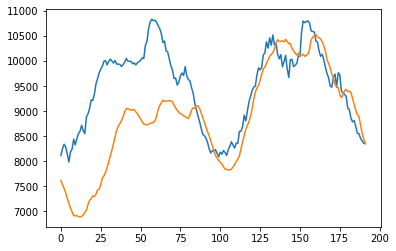

In [103]:
plt.plot(ttest.iloc[110,:].to_numpy())
plt.plot(ypred_t[110,:])

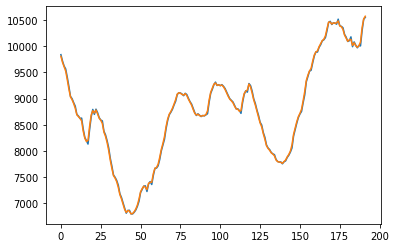

In [102]:
plt.plot(ttrain.iloc[110,:].to_numpy())
plt.plot(yhat[110,:])

## Lag features

In [8]:
from sklearn.model_selection import KFold, TimeSeriesSplit
reg_lag = autoreg.AutoSklearnRegressor(time_left_for_this_task=10000,
                                           per_run_time_limit=1000,
                                           initial_configurations_via_metalearning=0,
                                           ensemble_size=50, 
                                           ensemble_nbest=25,
                                           ensemble_memory_limit=6096, 
                                           seed=921, ml_memory_limit= 8196, 
                                           include_estimators = None,
                                           exclude_estimators=['gaussian_process'], 
                                           include_preprocessors=None, 
                                           exclude_preprocessors=None, 
                                           resampling_strategy=TimeSeriesSplit,
                                           resampling_strategy_arguments={'folds':4},
                                           tmp_folder=None, 
                                           output_folder=None, 
                                           delete_tmp_folder_after_terminate=False, 
                                           delete_output_folder_after_terminate=False, 
                                           shared_mode=False, 
                                           n_jobs = 4, 
                                           disable_evaluator_output=False, 
                                           get_smac_object_callback=None, 
                                           smac_scenario_args=None, 
                                           logging_config=None,
                                           metadata_directory=None)


reg_lag.fit(ftrain, ttrain)

[ERROR] [2020-07-16 00:25:58,403:EnsembleBuilder(4147298153):103243d702683cb45bbafffdfdf91052] Failed to lock model 2776591057.23.0.0.model files due to error 


/home/charles/anaconda3/envs/autosk07/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=False,
                     delete_tmp_folder_after_terminate=False,
                     disable_evaluator_output=False, ensemble_memory_limit=6096,
                     ensemble_nbest=25, ensemble_size=50,
                     exclude_estimators=['gaussian_process'],
                     exclude_preprocessors=None, get_smac_object_callback=None,
                     include_estimators=None, include_preprocessors=None,
                     initi...
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=8196,
                     n_jobs=4, output_folder=None, per_run_time_limit=1000,
                     resampling_strategy=<class 'sklearn.model_selection._split.TimeSeriesSplit'>,
                     resampling_strategy_arguments={'folds': 4}, seed=921,
                     shared_mode=False, smac_scenario_args=None,
                     time_l

In [9]:
reg_lag.cv_results_

{'mean_test_score': array([ 0.        ,  0.39571931, -0.25158603,  0.        ,  0.        ,
        -0.27439819,  0.26483724,  0.08392448, -0.14004355,  0.        ,
         0.        ,  0.17345345,  0.17571196,  0.34934867,  0.42350762,
         0.28561637,  0.3614465 , -0.20706088,  0.30711263,  0.13226541,
         0.        ,  0.24990681,  0.02852034,  0.13012039,  0.13135292,
         0.        ,  0.24576967,  0.3497749 ,  0.3614465 ,  0.37063611,
         0.38463753,  0.37197923,  0.        ,  0.        ,  0.        ,
         0.39678107,  0.24436404,  0.1431802 ,  0.        ,  0.38671489,
         0.3650919 ,  0.32465049,  0.41141553,  0.        , -0.28338423,
         0.42463362,  0.        ,  0.        ,  0.30966978,  0.4131266 ,
         0.41099627,  0.45473821,  0.41671098,  0.18974252,  0.18600376,
         0.08015879,  0.37745991,  0.        ,  0.32756173,  0.        ,
         0.41321892, -0.23461307,  0.40549619,  0.42522528, -0.275522  ,
         0.37474869,  0.        

In [10]:
print(reg_lag.get_models_with_weights())
print(reg_lag.sprint_statistics())

[(0.46, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'pca', 'regressor:__choice__': 'k_nearest_neighbors', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.02323308702744784, 'feature_preprocessor:pca:keep_variance': 0.997545290557514, 'feature_preprocessor:pca:whiten': 'True', 'regressor:k_nearest_neighbors:n_neighbors': 9, 'regressor:k_nearest_neighbors:p': 1, 'regressor:k_nearest_neighbors:weights': 'uniform'},
dataset_properties={
  'task': 5,
  'sparse': False,
  'multioutput': True,
  'target_type': 'regression',
  'signed': False})), (0.34, SimpleRegressionPipeline({'da

In [13]:
reg_lag.refit(ftrain, ttrain)

/home/charles/anaconda3/envs/autosk07/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=False,
                     delete_tmp_folder_after_terminate=False,
                     disable_evaluator_output=False, ensemble_memory_limit=6096,
                     ensemble_nbest=25, ensemble_size=50,
                     exclude_estimators=['gaussian_process'],
                     exclude_preprocessors=None, get_smac_object_callback=None,
                     include_estimators=None, include_preprocessors=None,
                     initi...
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=8196,
                     n_jobs=4, output_folder=None, per_run_time_limit=1000,
                     resampling_strategy=<class 'sklearn.model_selection._split.TimeSeriesSplit'>,
                     resampling_strategy_arguments={'folds': 4}, seed=921,
                     shared_mode=False, smac_scenario_args=None,
                     time_l

In [42]:
reg_lag._get_param_names()

['delete_output_folder_after_terminate',
 'delete_tmp_folder_after_terminate',
 'disable_evaluator_output',
 'ensemble_memory_limit',
 'ensemble_nbest',
 'ensemble_size',
 'exclude_estimators',
 'exclude_preprocessors',
 'get_smac_object_callback',
 'include_estimators',
 'include_preprocessors',
 'initial_configurations_via_metalearning',
 'logging_config',
 'max_models_on_disc',
 'metadata_directory',
 'metric',
 'ml_memory_limit',
 'n_jobs',
 'output_folder',
 'per_run_time_limit',
 'resampling_strategy',
 'resampling_strategy_arguments',
 'seed',
 'shared_mode',
 'smac_scenario_args',
 'time_left_for_this_task',
 'tmp_folder']

In [19]:
from pickle import dump
## pickle the model
dump(reg_lag, open('elia_200lag_3hr_8000_1000','wb'))

In [ ]:
## load model
from pickle import load
with open('elia_200lag_3hr_8000_1000', 'rb') as pickcle_file:
    model = load(pickcle_file)

In [14]:
ypred = reg_lag.predict(ftest)
yhat = reg_lag.predict(ftrain)
get_eval(ttest, ypred)
get_eval(ttrain, yhat)

MSE: 1446004.6953906815
MAE: 1082.0818042926878
r2_score: -1.4656335919821228
MSE: 218140.87671575687
MAE: 354.43726268933557
r2_score: 0.8627783811678066


In [6]:
ypred = reg_lag.predict(ftest)
yhat = reg_lag.predict(ftrain)
get_eval(ttest, ypred)
get_eval(ttrain, yhat)

MSE: 391574.7145126695
MAE: 469.047111562261
r2_score: 0.7461566866902299
MSE: 193388.31774138194
MAE: 334.4997603672407
r2_score: 0.8865509958951713


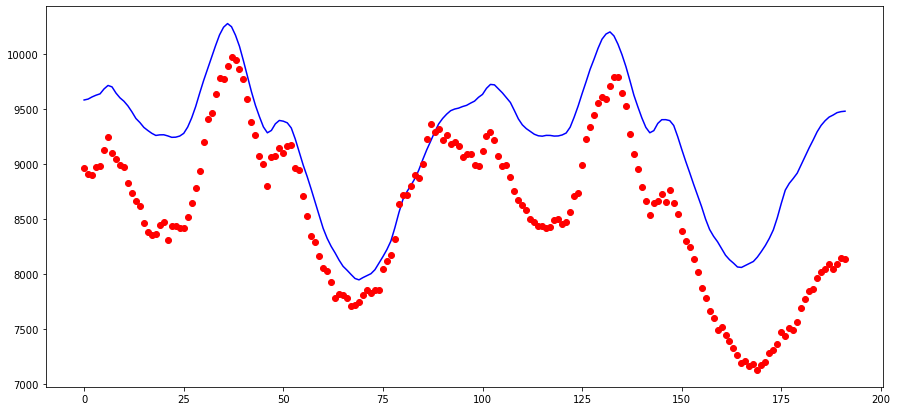

In [17]:
plt.figure(figsize = (15,7))
plt.plot(ypred[1,:],'b-')
plt.plot(ttest.to_numpy()[1,:],'ro')

**Confidence Interval**

In [90]:
from sklearn.utils import resample
n_bootstraps = 50
b_x = []
b_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(ftrain, ttrain, n_samples = 200)
    b_x.append(sample_X)
    b_y.append(sample_y)

In [91]:
prediction = []

for i, feature in enumerate(b_x):
    print(i)
    reg_lag.refit(feature, b_y[i])
    prediction.append(reg_lag.predict(ftest))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


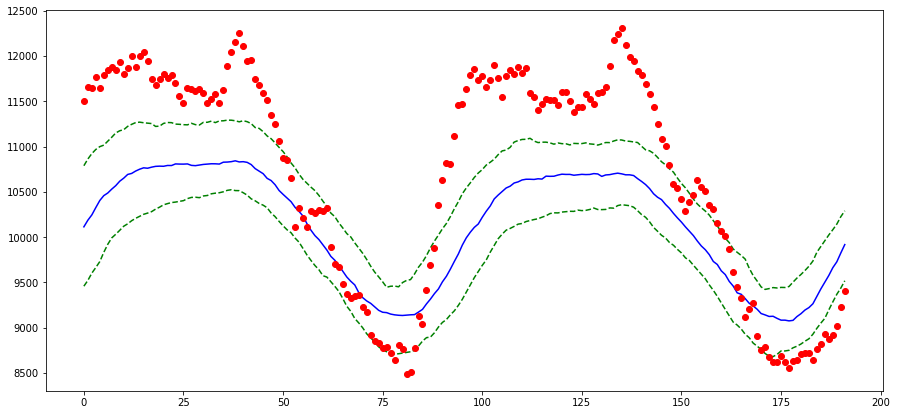

In [93]:
fig = plt.figure(figsize = (15,7))
plt.plot(np.quantile(prediction, 0.95, axis = 0)[100,:], 'g--')
plt.plot(np.quantile(prediction, 0.05, axis = 0)[100,:], 'g--')
plt.plot(np.quantile(prediction, 0.5, axis = 0)[100,:], 'b-')
plt.plot(ttest.to_numpy()[100,:], 'ro')

In [94]:
get_eval(ttest, np.quantile(prediction, 0.5, axis = 0))

MSE: 667214.6252636556
MAE: 697.2310156733639
r2_score: 0.5442368483688647


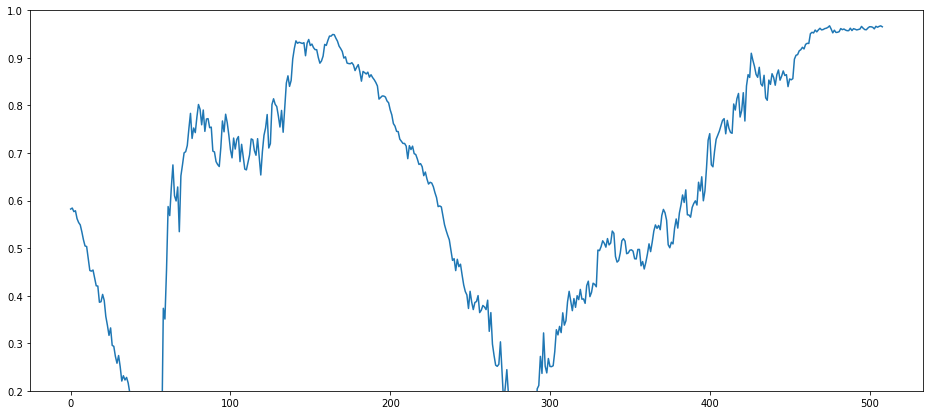

In [39]:
from sklearn.metrics import r2_score
r2_list_test = []
for i in range(ftest.shape[0]):
    o_y = np.transpose(ttest.to_numpy()[i,:].reshape(1,-1))
    p_y = np.transpose(np.quantile(prediction, 0.5, axis = 0)[i,:].reshape(1,-1))
    r2 = r2_score(o_y, p_y)
    r2_list_test.append(r2)

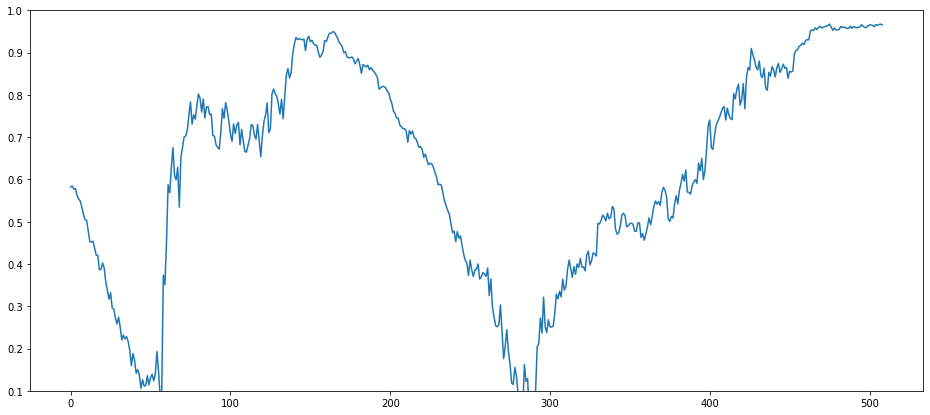

In [40]:
fig = plt.figure(figsize = (16, 7))
plt.ylim(0.1)
plt.plot(r2_list_test)

## lag + tsfresh features

In [118]:
ftrain.shape, ftrain_tf.shape

((617, 192), (617, 210))

In [124]:
ftrain_lts = np.concatenate([ftrain.to_numpy(), ftrain_tf.to_numpy()], axis = 1)
ftest_lts = np.concatenate([ftest.to_numpy(), ftest_tf.to_numpy()], axis = 1)

In [125]:
reg_lts = autoreg.AutoSklearnRegressor(time_left_for_this_task=600,
                                           per_run_time_limit=150,
                                           initial_configurations_via_metalearning=0,
                                           ensemble_size=25, 
                                           ensemble_nbest=10,
                                           ensemble_memory_limit=4096, 
                                           seed=921, ml_memory_limit=4096, 
                                           include_estimators=None,
                                           exclude_estimators='gaussian_process', 
                                           include_preprocessors=None, 
                                           exclude_preprocessors=None, 
                                           resampling_strategy='cv',
                                           resampling_strategy_arguments={'folds':5},
                                           tmp_folder=None, 
                                           output_folder=None, 
                                           delete_tmp_folder_after_terminate=False, 
                                           delete_output_folder_after_terminate=False, 
                                           shared_mode=False, 
                                           n_jobs = 6, 
                                           disable_evaluator_output=False, 
                                           get_smac_object_callback=None, 
                                           smac_scenario_args=None, 
                                           logging_config=None,
                                           metadata_directory=None)


reg_lts.fit(ftrain_lts, ttrain)

/home/charles/anaconda3/envs/autoskdev/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=False,
                     delete_tmp_folder_after_terminate=False,
                     disable_evaluator_output=False, ensemble_memory_limit=4096,
                     ensemble_nbest=10, ensemble_size=25,
                     exclude_estimators='gaussian_process',
                     exclude_preprocessors=None, get_smac_object_callback=None,
                     include_estimators=None, include_preprocessors=None,
                     initial_configurations_via_metalearning=0,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=4096,
                     n_jobs=6, output_folder=None, per_run_time_limit=150,
                     resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 5}, seed=921,
                     shared_mode=False, smac_scenario_args=None,
                     time_left_for_this_task=600

In [126]:
print(reg_lts.get_models_with_weights())

[(0.48, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'k_nearest_neighbors', 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 1000, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'uniform', 'feature_preprocessor:feature_agglomeration:affinity': 'cosine', 'feature_preprocessor:feature_agglomeration:linkage': 'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 294, 'feature_preprocessor:feature_agglomeration:pooling_func': 'median', 'regressor:k_nearest_neighbors:n_neighbors':

In [127]:
print(reg_lts.sprint_statistics())

auto-sklearn results:
  Dataset name: da80c721865540ece4c3281b51e8e2de
  Metric: r2
  Best validation score: 0.991896
  Number of target algorithm runs: 41
  Number of successful target algorithm runs: 14
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 23
  Number of target algorithms that exceeded the memory limit: 4



In [128]:
reg_lts.refit(ftrain_lts, ttrain)

/home/charles/anaconda3/envs/autoskdev/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=False,
                     delete_tmp_folder_after_terminate=False,
                     disable_evaluator_output=False, ensemble_memory_limit=4096,
                     ensemble_nbest=10, ensemble_size=25,
                     exclude_estimators='gaussian_process',
                     exclude_preprocessors=None, get_smac_object_callback=None,
                     include_estimators=None, include_preprocessors=None,
                     initial_configurations_via_metalearning=0,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=4096,
                     n_jobs=6, output_folder=None, per_run_time_limit=150,
                     resampling_strategy='cv',
                     resampling_strategy_arguments={'folds': 5}, seed=921,
                     shared_mode=False, smac_scenario_args=None,
                     time_left_for_this_task=600

In [129]:
ypred_lts = reg_lts.predict(ftest_lts)
yhat_lts = reg_lts.predict(ftrain_lts)

In [130]:
get_eval(ttest, ypred_lts)
get_eval(ttrain, yhat_lts)

MSE: 188248.0893609648
MAE: 374.7914676990131
r2_score: 0.7592872269827429
MSE: 751.1276533645987
MAE: 21.696752695735867
r2_score: 0.9990327323912803


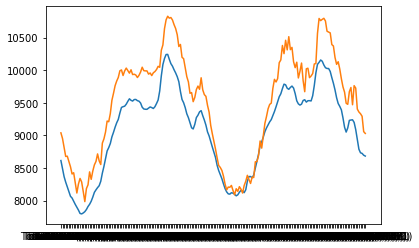

In [134]:
plt.plot(ypred_lts[100,:])
plt.plot(ttest.iloc[100,:])